# INSTALACION DE PAQUETES

In [1]:
!pip3 install  pandas numpy matplotlib seaborn scipy imblearn requests tqdm scikit-learn umap-learn xgboost lightgbm

# CARGA DE LIBRERIAS

In [ ]:
import database
import eda
import xgbm
import lgbmq


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DESCARGA DE LOS DATOS

In [3]:
database.initialize_database()
cats = database.download_data()

# CARGA DATOS

In [4]:
database.upload_to_db(cats)

Todo listo. Base de datos en: /Users/guille/Documents/LASALLE/MASTER/MD005/Entregas/XGBOOST/database/quickdraw.db


# DESCARGA DE DATOS A DATAFRAME

In [5]:
df = database.get_dataframe()

# EDA

In [6]:
df

,id,category,data,recognized
0,1,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
1,2,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
2,3,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
3,4,dragon,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
4,5,dragon,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
...,...,...,...,...
49995,49996,diamond,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
49996,49997,diamond,b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...,1
49997,49998,diamond,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1
49998,49999,diamond,"b""\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00...",1


Transformamos el dataframe

In [7]:
df = eda.transform_dataframe(df)

Generadas 784 columnas de píxeles. Eliminando columna original 'data'...


In [8]:
eda.data_resume_info(df=df)

--- Informacion General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 787 entries, id to px_783
dtypes: int64(2), object(1), uint8(784)
memory usage: 38.5+ MB

--- Valores Nulos ---
id            0
category      0
recognized    0
px_0          0
px_1          0
             ..
px_779        0
px_780        0
px_781        0
px_782        0
px_783        0
Length: 787, dtype: int64

--- Filas Duplicadas ---
Total: 0

--- Estadisticas Descriptivas ---


,id,category,recognized,px_0,px_1,px_2,px_3,px_4,px_5,px_6,...,px_774,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783
count,50000.000000,50000,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,dragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,25000.500000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,14433.901067,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,12500.750000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,25000.500000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,37500.250000,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


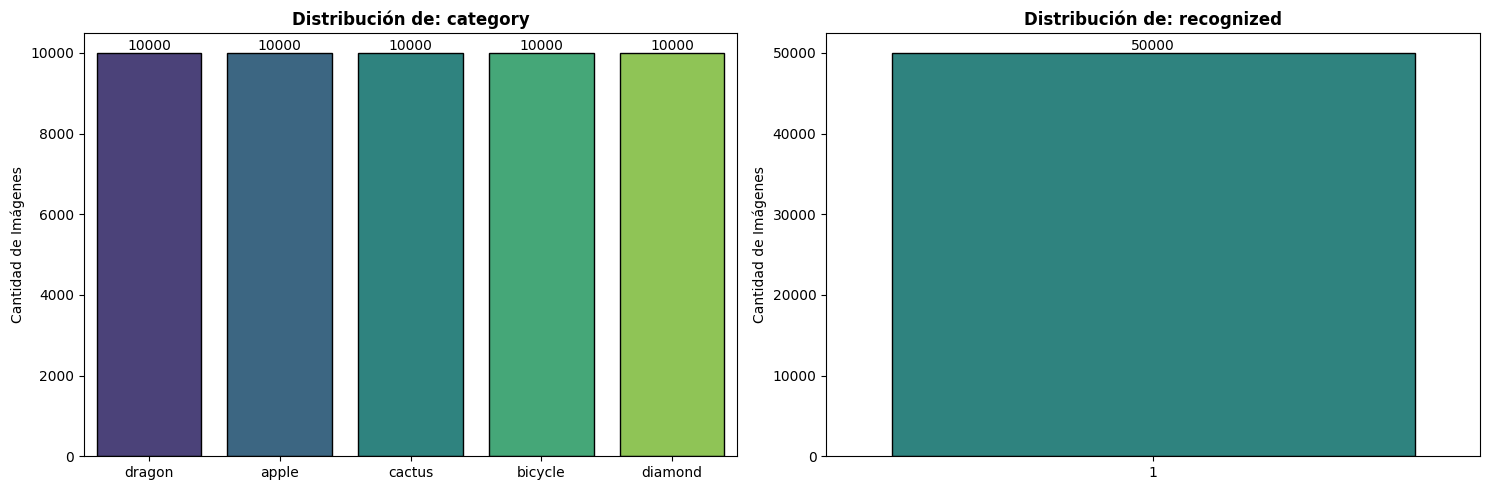

In [9]:
eda.plot_class_balance(df=df)

Umbral mínimo de tinta (q=0.01): 18954.96
Cantidad de dibujos sospechosos de estar vacíos: 500
Conteo de categorías en dibujos con poca tinta:
category
diamond    278
dragon      79
cactus      64
apple       55
bicycle     24
Name: count, dtype: int64

Distribución de 'recognized' en estos dibujos:
  - 1: 100.00%


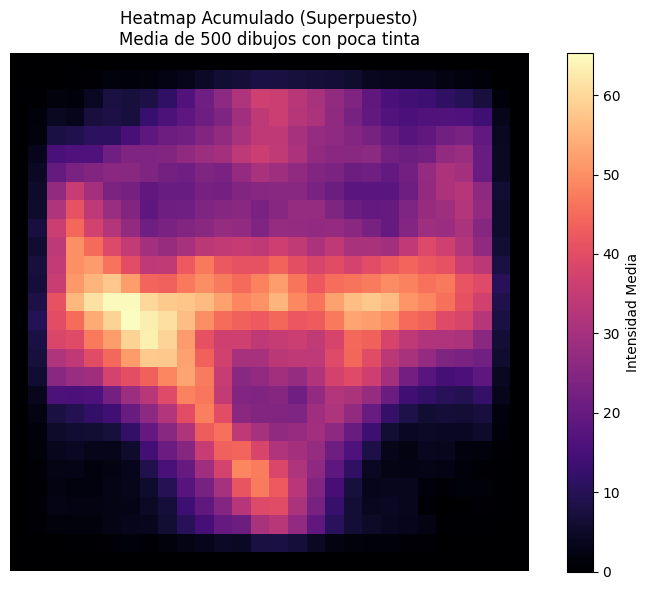


Mostrando revisión completa de los 500 dibujos seleccionados...


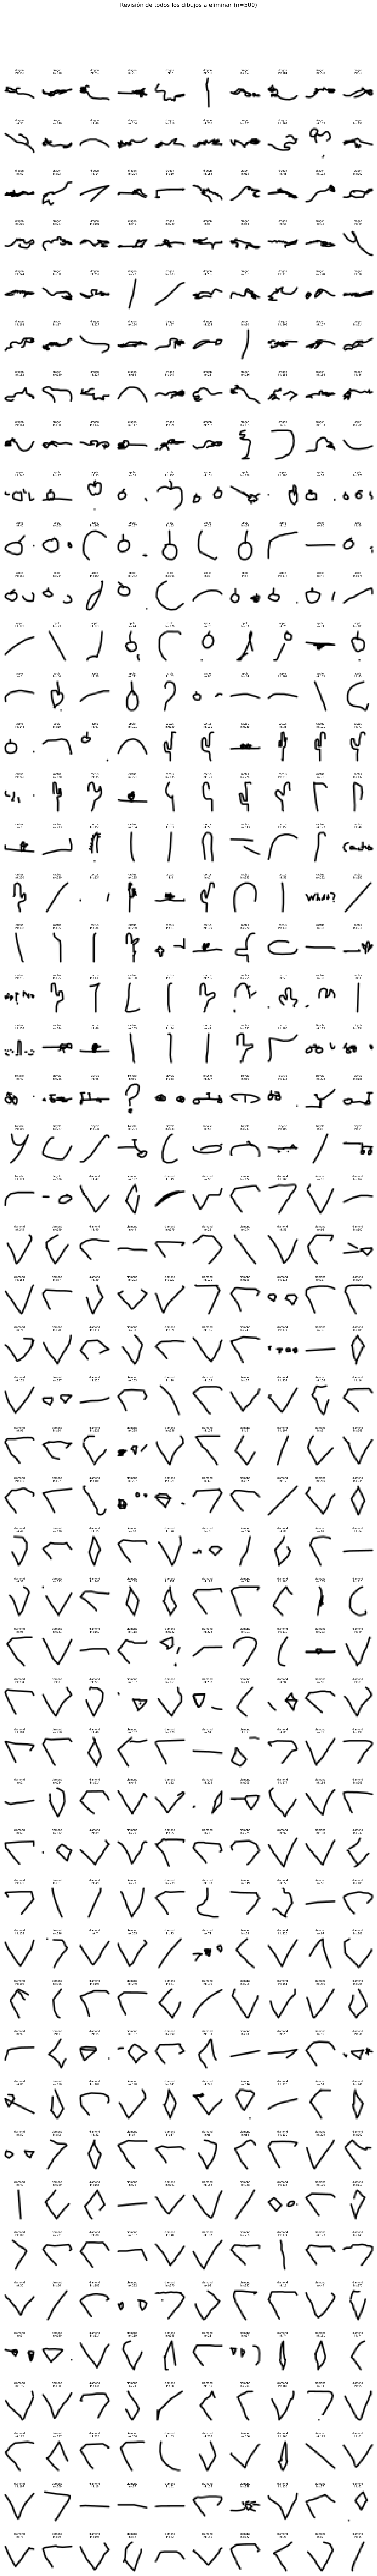

Eliminados 500 dibujos. Filas restantes: 49500


In [10]:
df = eda.drop_low_ink_drawings(df, quantile=0.01)

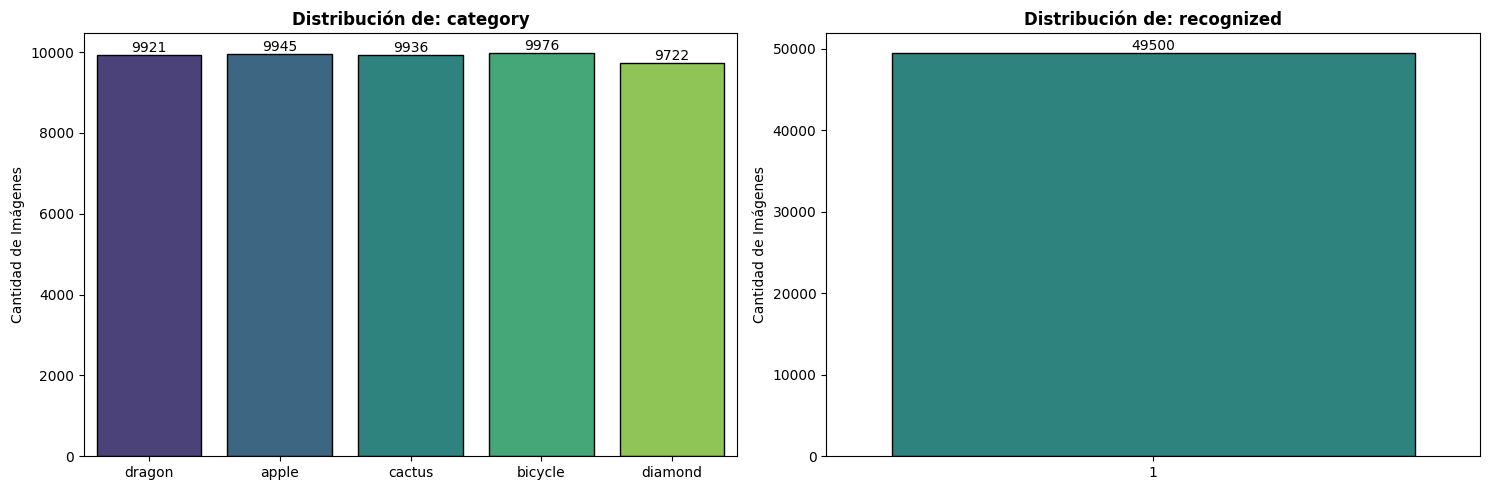

In [11]:
eda.plot_class_balance(df=df)

Encontramos que nuestro dataset se encuentra bastante balanceado, donde se garantiza que nuestras dos categorias de entrenamiento cuentan con la misma dimensionalidad. En caso de que haya una categoria con menor cantidad toca buscar metodologias de balanceo como SMOTE y undersampling, o en su defecto aplicar un poco de data augmentation para mejorar.

Generando imágenes promedio para 5 categorías...


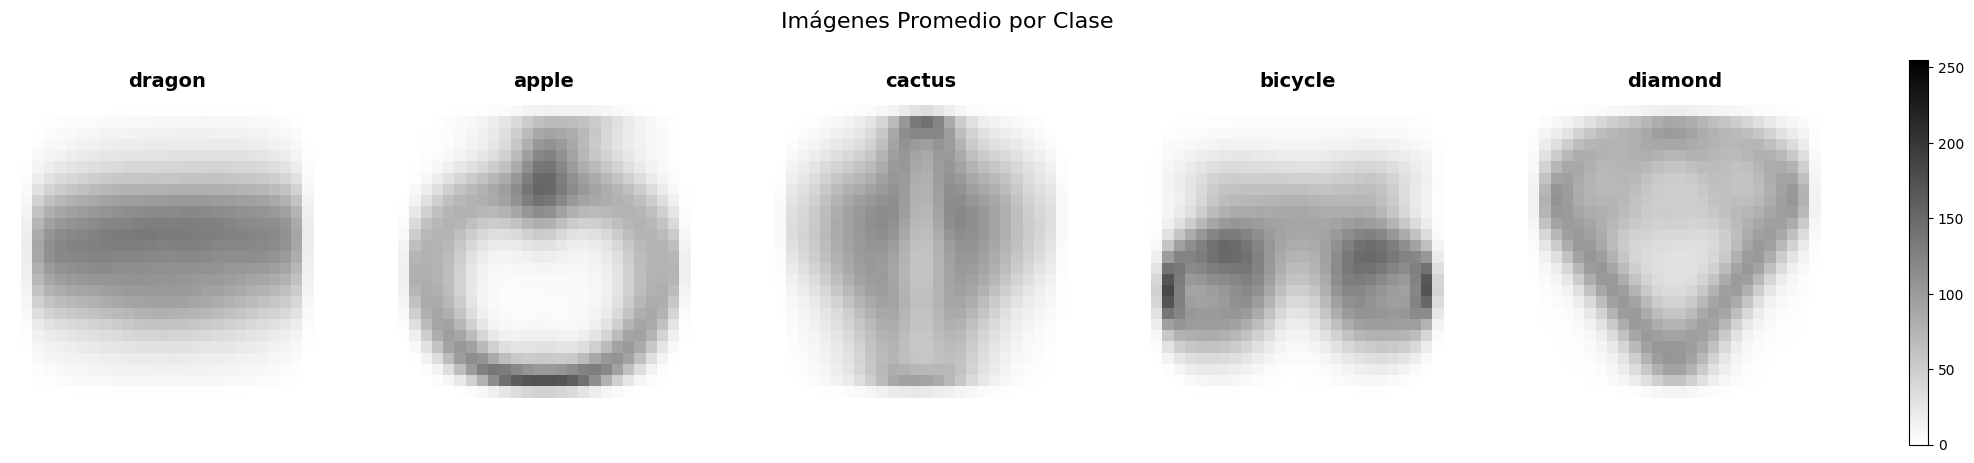

In [12]:
eda.plot_average_images(df=df)

sobre pone todas las imagenes que tengamos de la categoria e identifica de manera visual que tanto se parecen. Para el caso del dragon tenemos una sola nube gris, lo que implica que es una imagen compleja donde la interpretabilidad de individuo hace que la imagen cuenta con una alta varianza espacial es decir tenemos que generar un centrado por centro de masa
Para los otros casos se observa que siguen formas similares y tenemos una gran concentración de tinta en las partes caracteristicas de la imagen

Calculando complejidad (suma de intensidades)...


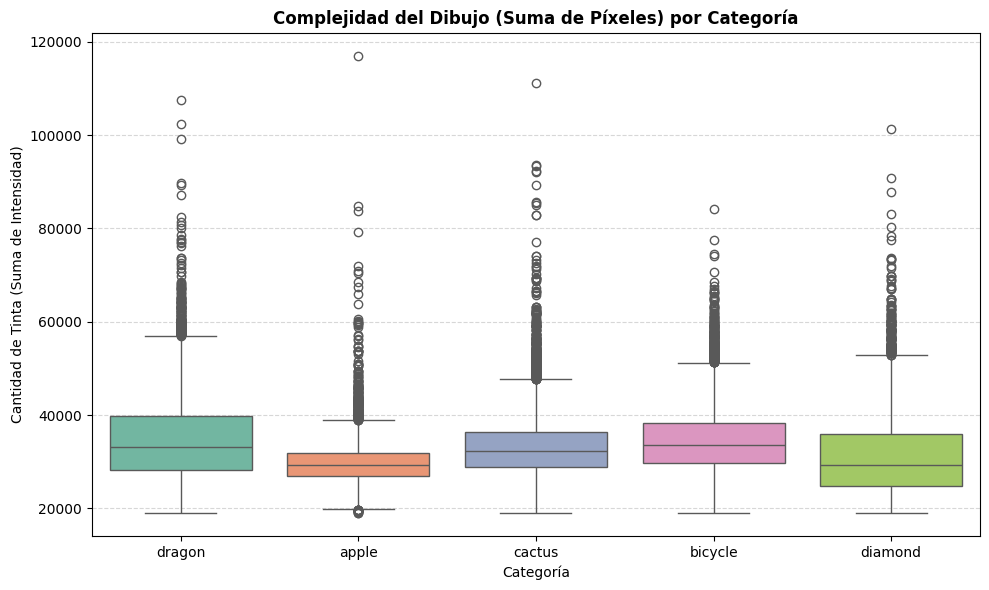

--- Estadísticas de Complejidad ---
                  mean          std      min      50%       max
category                                                       
apple     29669.967924  4414.079805  19033.0  29300.0  117009.0
bicycle   34571.300521  6964.219045  19046.0  33609.0   84230.0
cactus    33293.956622  6834.616157  18989.0  32239.5  111157.0
diamond   31157.980045  8469.605633  18957.0  29403.5  101243.0
dragon    34676.162282  8844.748389  18955.0  33235.0  107570.0


In [13]:
eda.analyze_complexity(df=df)

observando la imagen podemos decir que definitivamente dragon tiene una mayor varianza, es decir una cantidad mayor de diferentes dibujos. Adicional encontramos que tenemos pixeles outlier, quiere decir, gente que dibujo usando mucha titna o poca. Para el caso de dragon observamos que se usa mucha más cantidad de tinta lo que quiere decir más cocnentración en los detalles del dibujo. Manzana tiene una cantidad superior de outliers por debajo del bigote inferior lo que quiere decir que hay más dibujos incompletos o lineas sueltas en el dibujo. Las imagenes tiene una diferencia significativa en sus medias, pero tenemos que se solapan, eso quiere decir, que si se tiene una imagen con una cantidad de tinta similar a la parte en la que se encuentran los boxplot al modelo le sería dificil distinguir los dos grupos.

In [14]:
eda.test_complexity_significance(df=df)

Calculando complejidad sobre 784 píxeles para el test...

--- Resultado ANOVA (Diferencia de Medias en Cantidad de Tinta) ---
Estadístico F: 906.56
P-valor: 0.0000e+00


Con ANOVA confirmamos un Pvalor <0.05 lo que nos indica que rechazamos la hipotesis nula y decimos que por lo menos una de las media de concentración de tinta de nuestros grupos es diferente, lo que nos indica que no tenemos ningun dibujo que tenga en promedio la misma concentración de tinta que los otros grupos

Centramos las imagenes a partir de su centro de masa

Centrando 49500 imágenes. Esto puede tomar unos momentos...
Proceso finalizado.
Generando imágenes promedio para 5 categorías...


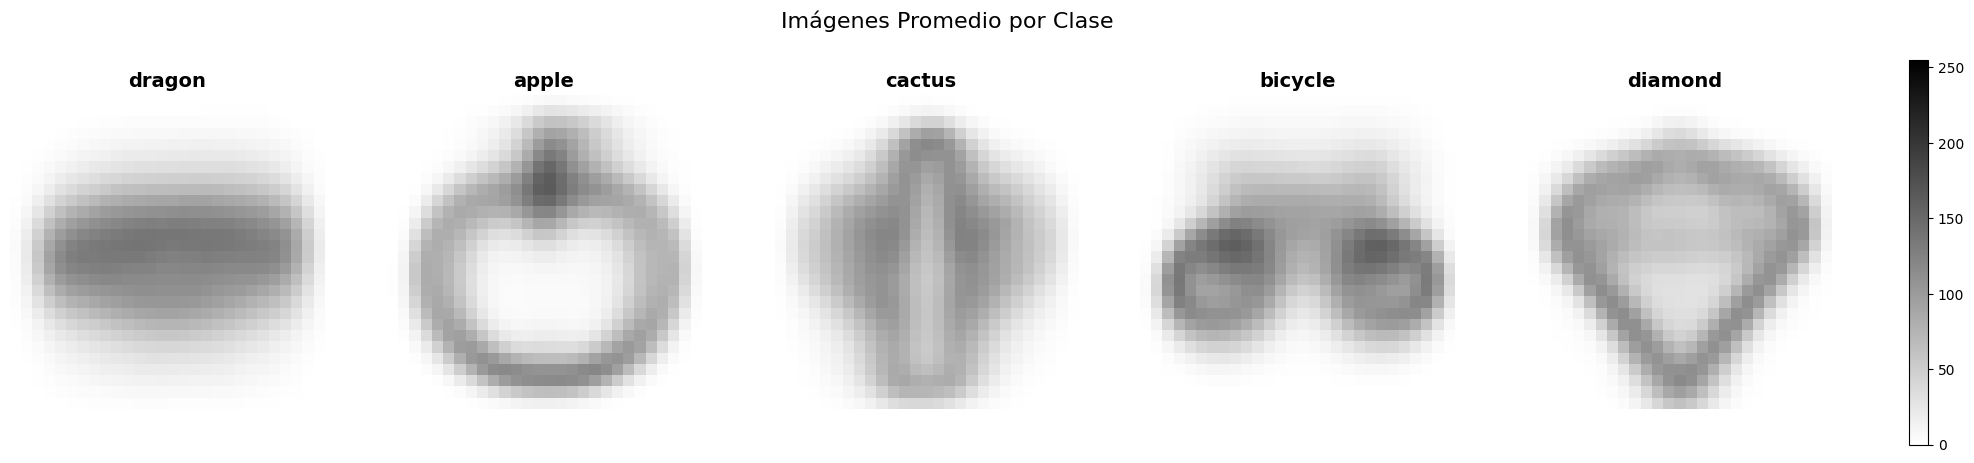

In [15]:
df_centered = eda.preprocess_center_images(df=df)
eda.plot_average_images(df=df_centered)

Calculando complejidad (suma de intensidades)...


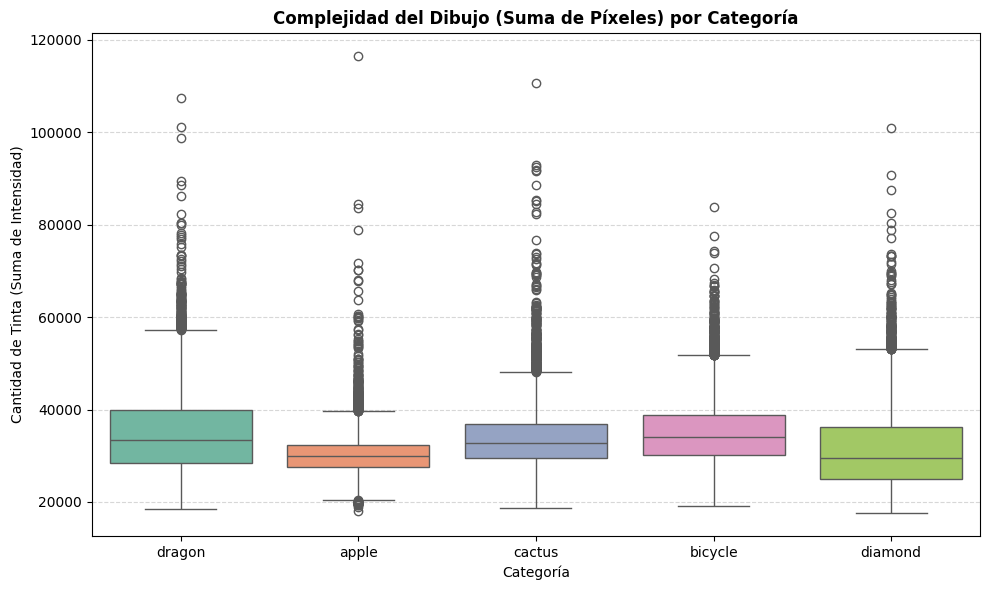

--- Estadísticas de Complejidad ---
                  mean          std      min      50%       max
category                                                       
apple     30228.177174  4407.950323  18057.0  29890.0  116557.0
bicycle   34944.749298  6941.394519  19068.0  34032.0   83895.0
cactus    33747.920894  6794.695891  18684.0  32761.0  110645.0
diamond   31417.852088  8427.522488  17534.0  29609.5  100988.0
dragon    34845.705876  8856.859218  18517.0  33426.0  107299.0


In [16]:
eda.analyze_complexity(df=df_centered)

Calculando varianza para 784 píxeles...


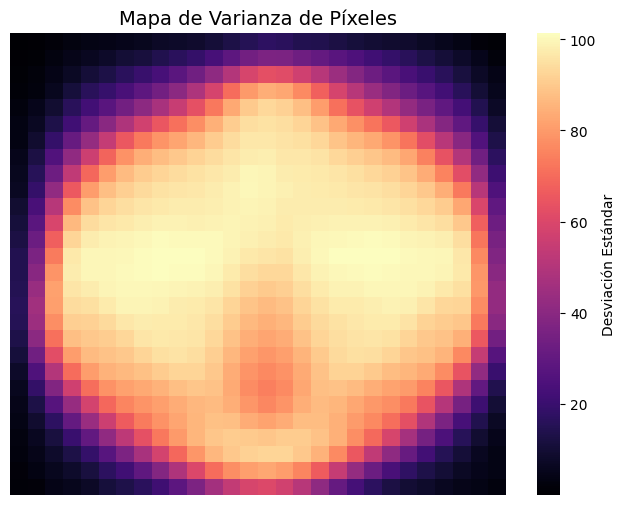

In [17]:
eda.plot_pixel_variance_heatmap(df=df_centered)

In [18]:
df_clean = eda.remove_low_variance_pixels(df, threshold=0)

Análisis de reducción de dimensionalidad (Threshold=0)...
Columnas iniciales: 784
Columnas finales: 676


In [19]:
df_clean.shape

(49500, 679)

Usando una muestra de 5000 imágenes para UMAP...
Ejecutando UMAP en 5000 imágenes...


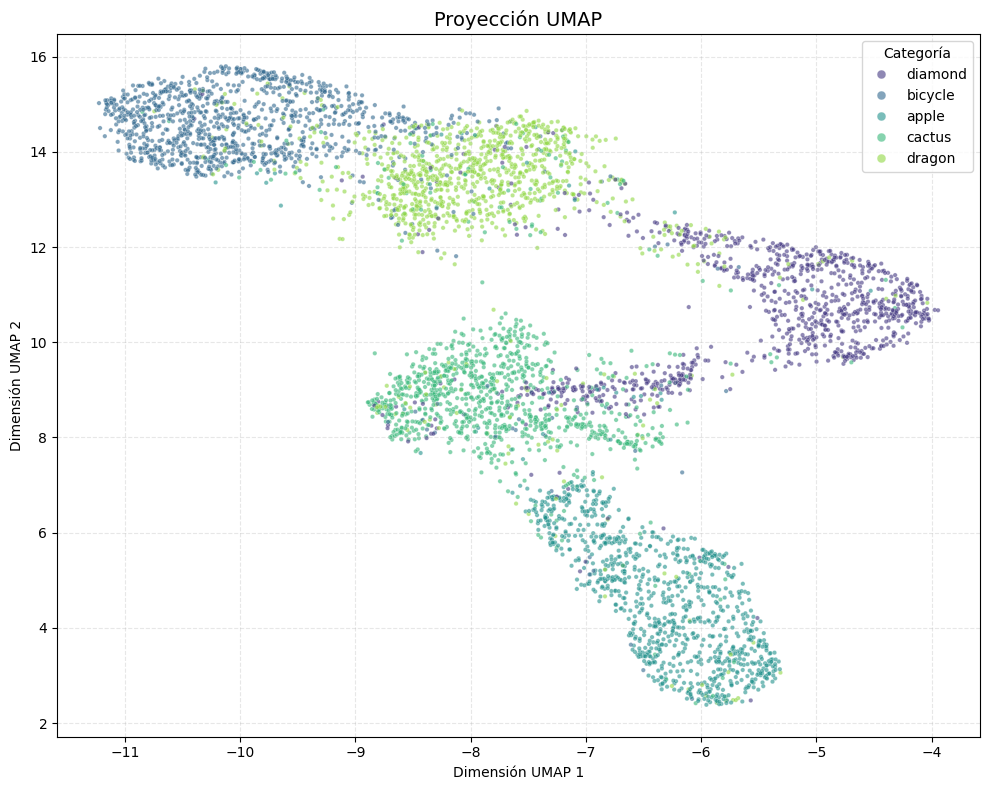

In [25]:
eda.visualize_umap_projection(df_clean, n_samples=5000)

Como sabemos que la base de datos tiene algunos dibujos que están prácticamente vacíos, vamos a proceder a intentar eliminar los que tienen poca tinta, mostrando un heatmap de los dibujos

In [21]:
eda.data_resume_info(df=df_clean)

--- Informacion General ---
<class 'pandas.core.frame.DataFrame'>
Index: 49500 entries, 0 to 49999
Columns: 679 entries, id to px_754
dtypes: int64(2), object(1), uint8(676)
memory usage: 33.4+ MB

--- Valores Nulos ---
id            0
category      0
recognized    0
px_29         0
px_30         0
             ..
px_750        0
px_751        0
px_752        0
px_753        0
px_754        0
Length: 679, dtype: int64

--- Filas Duplicadas ---
Total: 0

--- Estadisticas Descriptivas ---


,id,category,recognized,px_29,px_30,px_31,px_32,px_33,px_34,px_35,...,px_745,px_746,px_747,px_748,px_749,px_750,px_751,px_752,px_753,px_754
count,49500.000000,49500,49500.0,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,...,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000,49500.000000
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,bicycle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,24926.846040,NaN,1.0,0.009111,0.154444,0.362242,0.626323,1.008040,1.496202,2.075576,...,8.953677,5.980606,3.727677,2.156545,1.197535,0.643859,0.359051,0.171475,0.059232,0.003051
std,14399.531572,NaN,0.0,0.368481,3.366662,5.436359,7.173780,9.010248,11.037009,13.018504,...,26.561427,21.831627,17.298005,13.032762,9.713104,7.073717,5.334231,3.565648,2.037529,0.191146
min,1.000000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12465.750000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24916.500000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37340.250000,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# xgboost

In [22]:
X_train, X_test, y_train, y_test = xgbm.split_df(df=df_clean)

In [23]:
xgbm.train_model(X_train, y_train, X_test, y_test)

Early stopping alcanzado en iteración: 399
Train Accuracy: 0.9834090909090909
Test Accuracy: 0.9290909090909091

Reporte (Test):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1989
           1       0.94      0.94      0.94      1995
           2       0.91      0.92      0.92      1987
           3       0.97      0.92      0.94      1945
           4       0.85      0.90      0.88      1984

    accuracy                           0.93      9900
   macro avg       0.93      0.93      0.93      9900
weighted avg       0.93      0.93      0.93      9900



,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,30
,enable_categorical,False
,eval_metric,'mlogloss'


In [24]:
xgbm.run_grid_search(X_train, y_train, X_test, y_test)

Iniciando Grid Search...
Fitting 3 folds for each of 96 candidates, totalling 288 fits

Mejores parámetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 350, 'subsample': 0.8}
Mejor Accuracy en CV: 0.9313

Reporte de clasificación con el mejor modelo (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1989
           1       0.95      0.95      0.95      1995
           2       0.93      0.93      0.93      1987
           3       0.98      0.93      0.95      1945
           4       0.86      0.92      0.89      1984

    accuracy                           0.94      9900
   macro avg       0.94      0.94      0.94      9900
weighted avg       0.94      0.94      0.94      9900



,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,30
,enable_categorical,False
,eval_metric,'mlogloss'
